In [ ]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

#for warning

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:


df_raw=pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv", parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
df_raw.isna().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume,0


In [ ]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

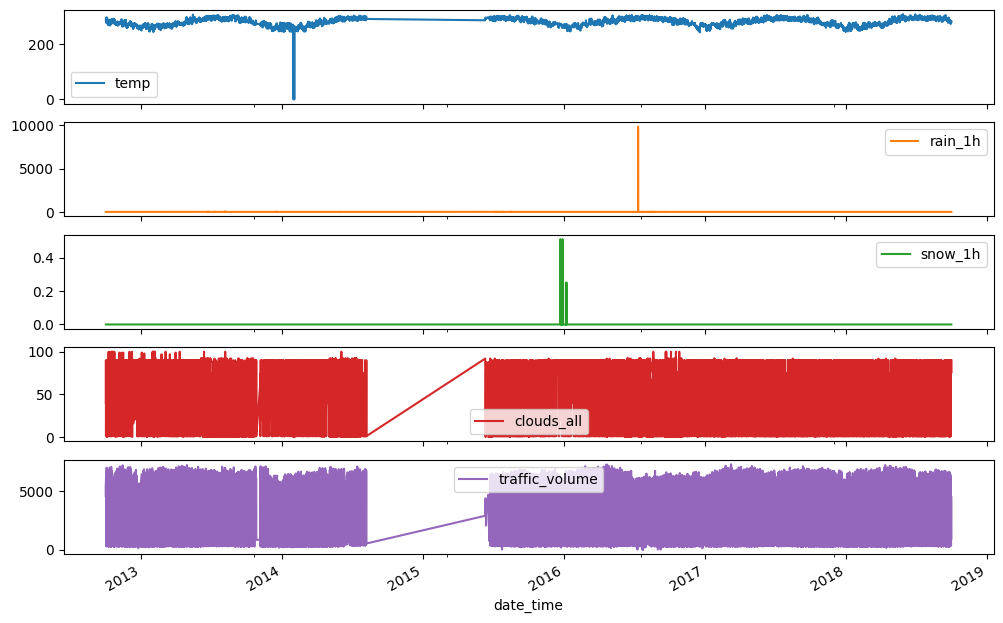

In [ ]:
plot_features = df_raw[plot_cols]
_= plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


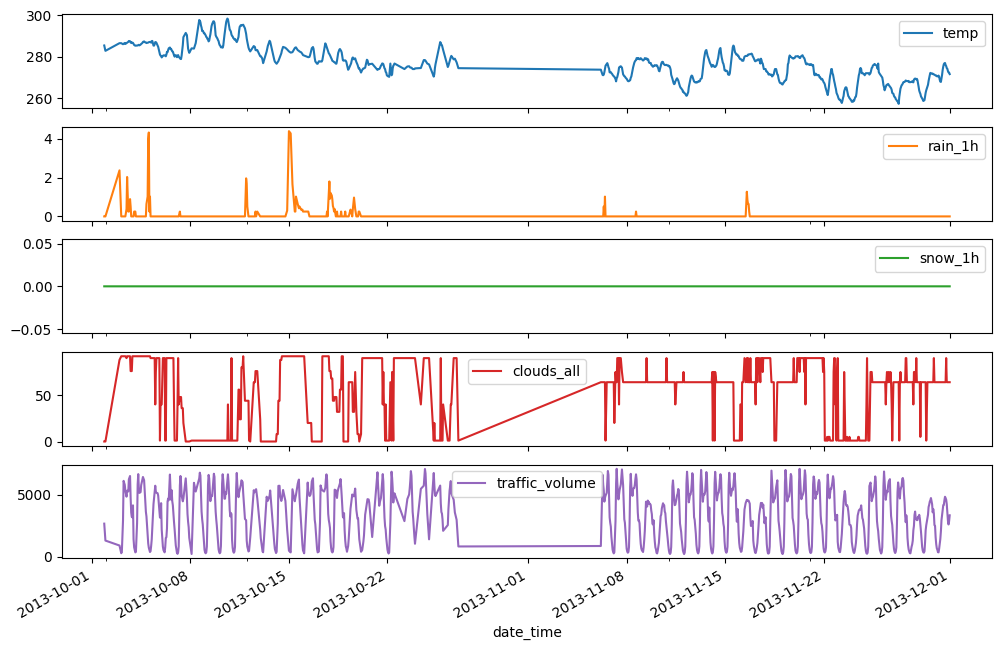

In [ ]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-08-08 00:00:00,NaN,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,NaN,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,NaN,287.586,0.0,0.0,92,Rain,light rain,2886


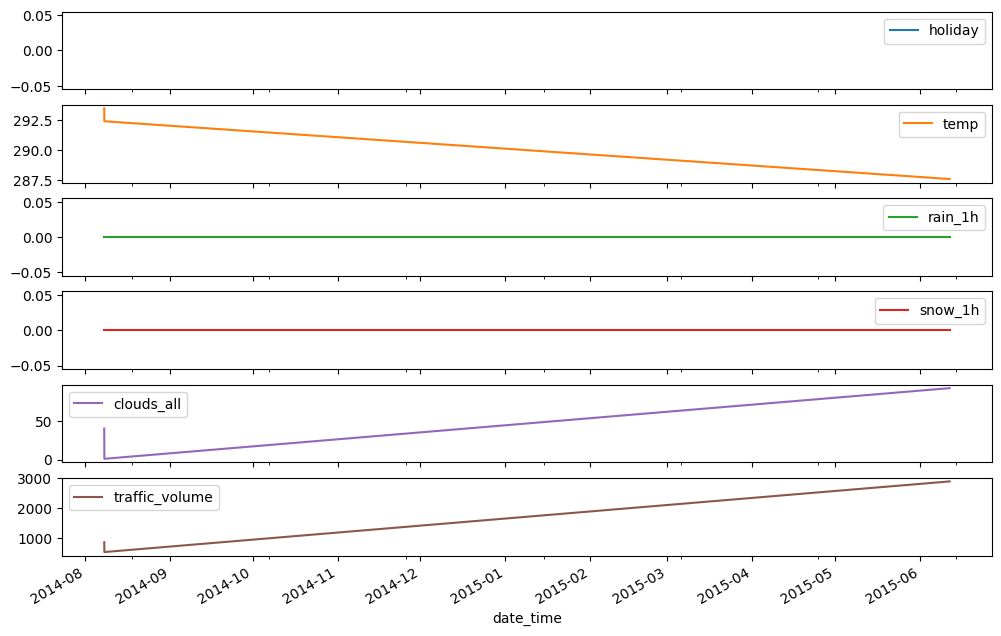

In [ ]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
pip install --upgrade --user matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 39.7 MB/s eta 0:00:00


In [ ]:
print(df_raw.index.duplicated().sum())
df_raw= df_raw.reset_index(drop=True)

7629


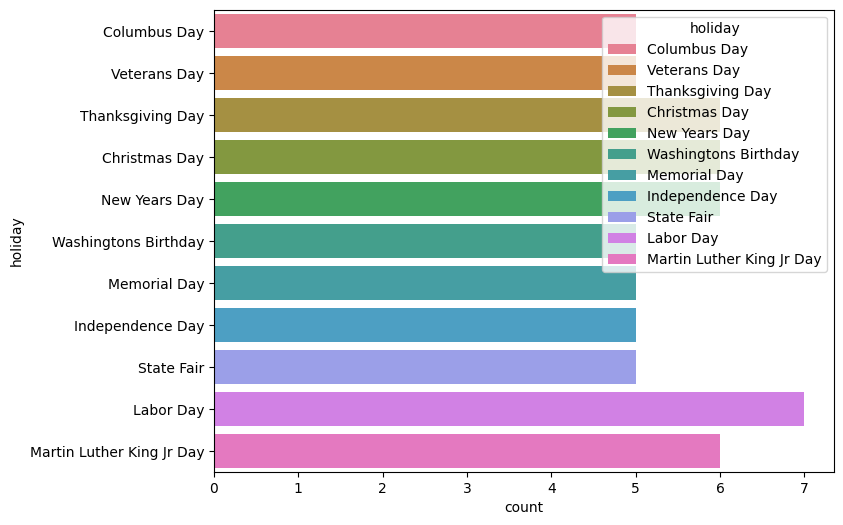

In [ ]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_raw.loc[df_raw.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays, hue='holiday')
plt.show()

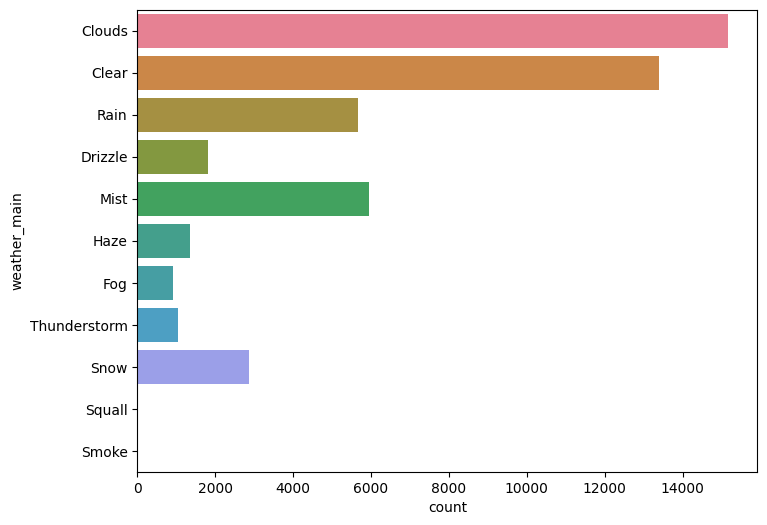

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw,hue='weather_main')
plt.show()

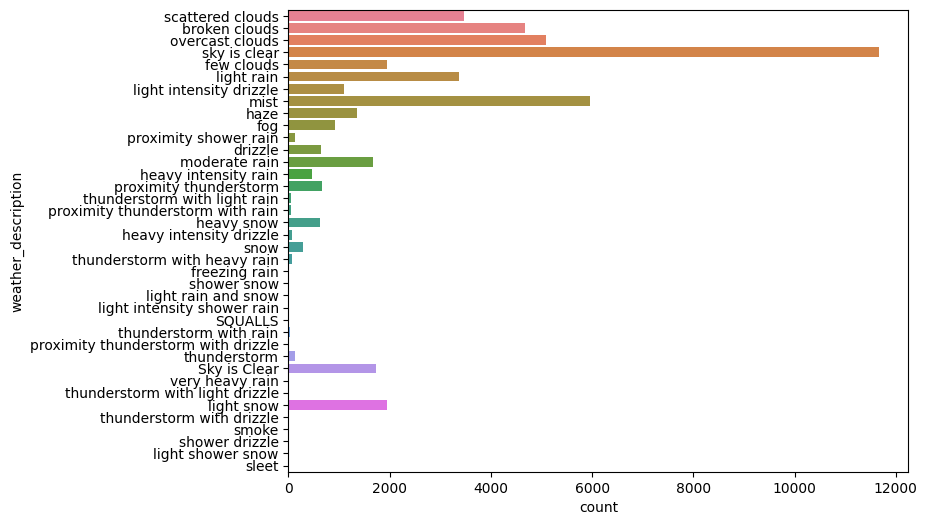

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw , hue='weather_description')
plt.show()

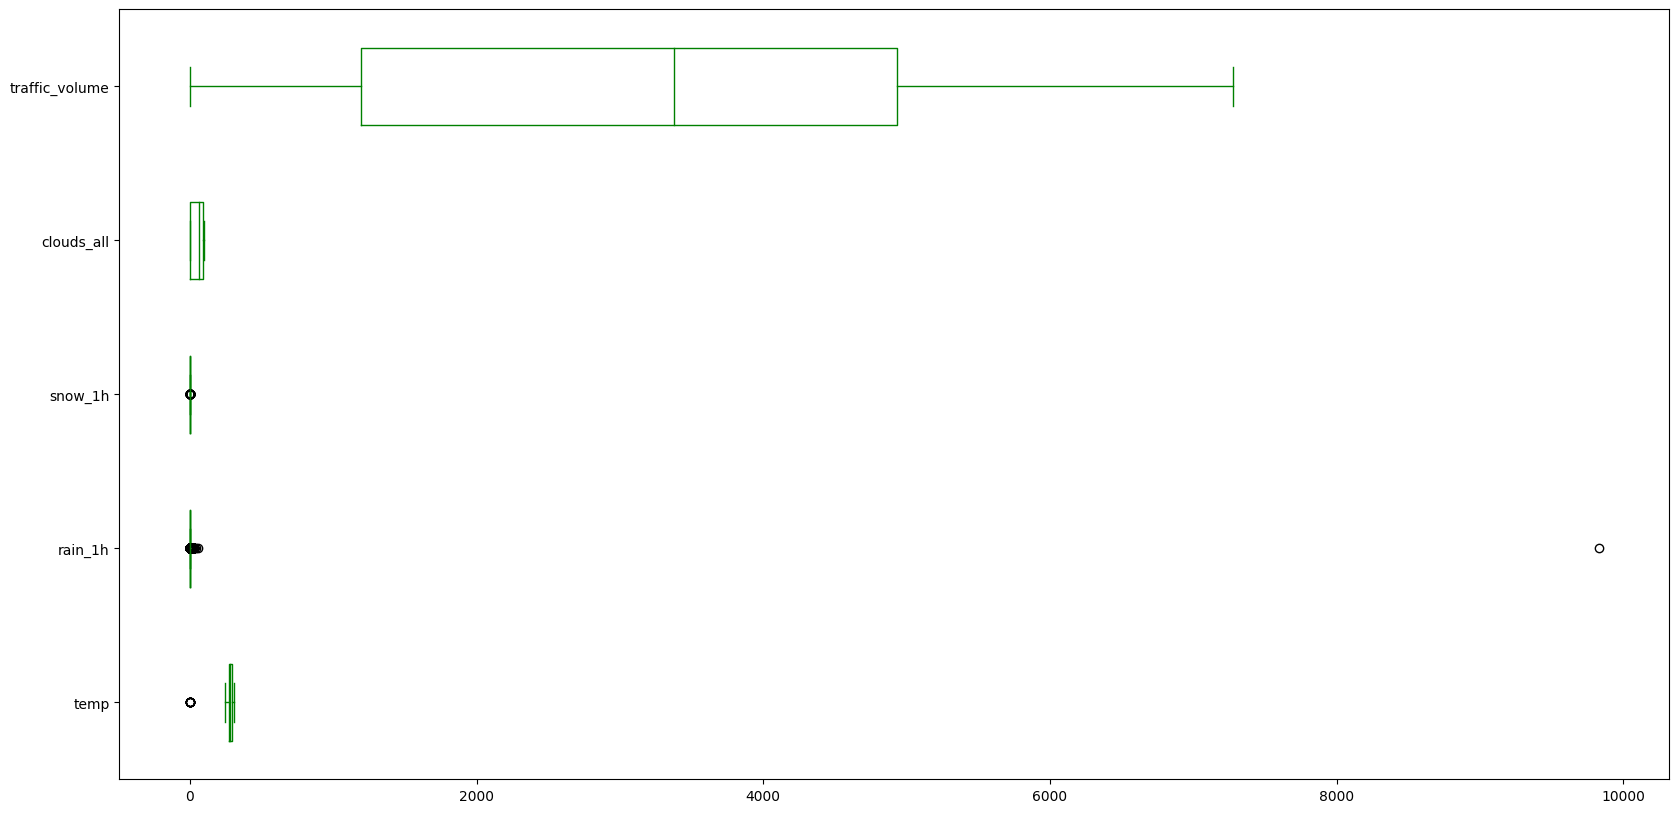

In [ ]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

In [ ]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
11898,NaN,0.0,0.0,0.0,0,Clear,sky is clear,361
11899,NaN,0.0,0.0,0.0,0,Clear,sky is clear,734
11900,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2557
11901,NaN,0.0,0.0,0.0,0,Clear,sky is clear,5150
11946,NaN,0.0,0.0,0.0,0,Clear,sky is clear,291
11947,NaN,0.0,0.0,0.0,0,Clear,sky is clear,284
11948,NaN,0.0,0.0,0.0,0,Clear,sky is clear,434
11949,NaN,0.0,0.0,0.0,0,Clear,sky is clear,739
11950,NaN,0.0,0.0,0.0,0,Clear,sky is clear,962
11951,NaN,0.0,0.0,0.0,0,Clear,sky is clear,1670


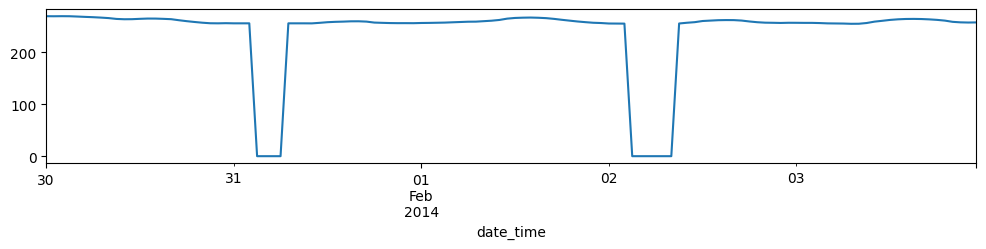

In [ ]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [ ]:
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [ ]:
print(df_raw.index)
print(df_raw.index.dtype)


DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=48204, freq=None)
datetime64[ns]


In [ ]:
df_raw.index = pd.to_datetime(df_raw.index)


In [ ]:
print(df_raw.index.min(), df_raw.index.max())  # To see the range of dates in the index
print(df_raw.index)


2012-10-02 09:00:00 2018-09-30 23:00:00
DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=48204, freq=None)


In [ ]:
data_for_date = df_raw.loc['2014-01-31']
print(data_for_date)


                    holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-01-31 00:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 01:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 02:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 03:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 04:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 05:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 06:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 07:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 08:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 09:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 10:00:00     NaN  255.84     0.00      0.0           0   
2014-01-31 11:00:00     NaN  256.88     0.00      0.0           0   
2014-01-31 12:00:00     NaN  258.1

In [ ]:

data_for_date = df_raw.loc['2014-02-02']
print(data_for_date)


                    holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-02-02 00:00:00     NaN  255.59      0.0      0.0           0   
2014-02-02 01:00:00     NaN  255.48      0.0      0.0           0   
2014-02-02 02:00:00     NaN  255.37      0.0      0.0           0   
2014-02-02 03:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 04:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 05:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 06:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 07:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 08:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 09:00:00     NaN  255.62      0.0      0.0           0   
2014-02-02 10:00:00     NaN  257.04      0.0      0.0           0   
2014-02-02 11:00:00     NaN  258.17      0.0      0.0           0   
2014-02-02 12:00:00     NaN  260.3

In [ ]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan
df_1[bad_temps]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962


In [ ]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14
258.4327777777778


In [ ]:
df_1[bad_temps & day_1]


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,5150


In [ ]:
df_1[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,NaN,0.0,0.0,0,Clear,sky is clear,1670


In [ ]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [ ]:
# Set day 2 values
df_1.loc[bad_temps & day_2, 'temp'] = df_1[day_2].temp.mean()
df_1.loc[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,NaN,258.432778,0.0,0.0,0,Clear,sky is clear,1670


In [ ]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,NaN,257.140000,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,NaN,255.930000,0.00,0.0,0,Clear,sky is clear,5269


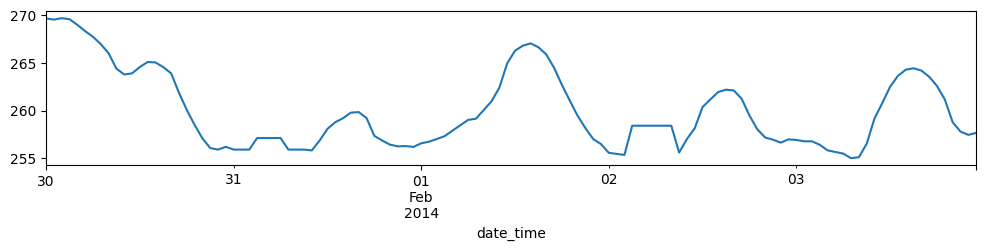

In [ ]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [ ]:
df_1[df_1.rain_1h > 100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-07-11 17:00:00,NaN,302.11,9831.3,0.0,75,Rain,very heavy rain,5535


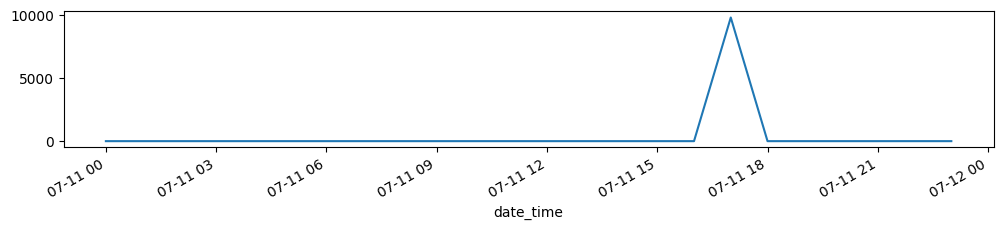

In [ ]:
plot_features = df_1.loc['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

In [ ]:
df_2 = df_1.copy()
df_2.loc['2016-07-11 17:00:00','rain_1h'] = np.nan
df_2.loc['2016-07-11 17:00:00','rain_1h'] = df_2.rain_1h.mean()

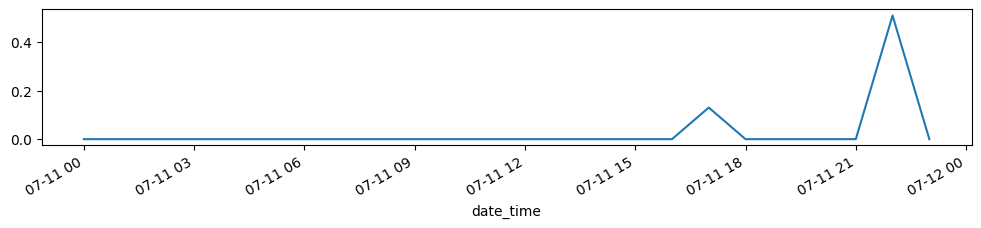

In [ ]:
plot_features = df_2.loc['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

In [ ]:
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


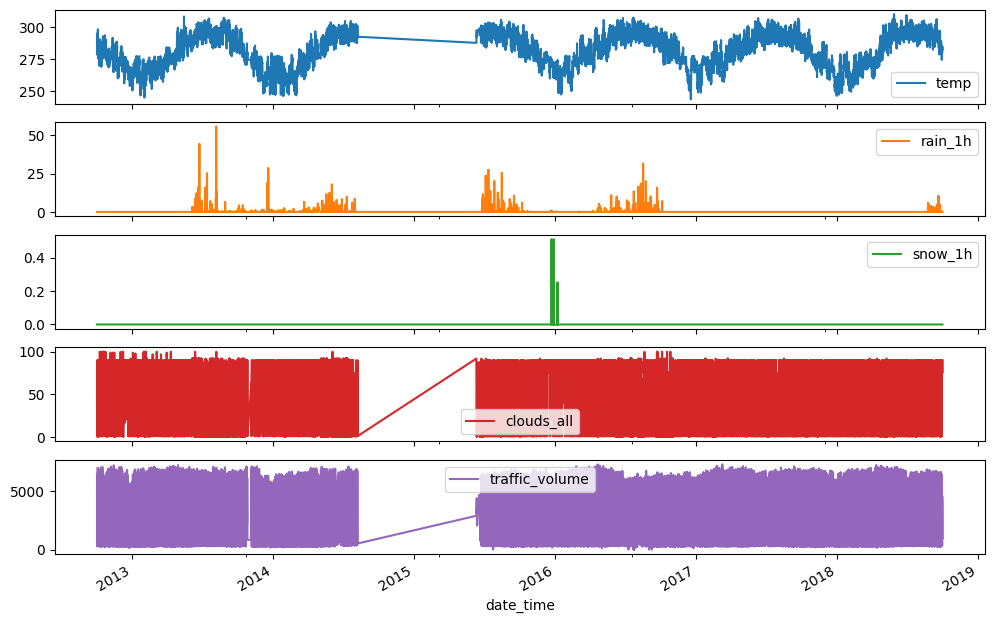

In [ ]:
plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [ ]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               61 non-null     object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          48204 non-nul

In [ ]:
df_4 = df_3.copy()

# Create 'is_holiday' column with integer values (1 or 0)
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0).astype(float)

# Display the DataFrame information to check the data types
df_4.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  bool   
 6   weather_Clouds        48204 non-null  bool   
 7   weather_Drizzle       48204 non-null  bool   
 8   weather_Fog           48204 non-null  bool   
 9   weather_Haze          48204 non-null  bool   
 10  weather_Mist          48204 non-null  bool   
 11  weather_Rain          48204 non-null  bool   
 12  weather_Smoke         48204 non-null  bool   
 13  weather_Snow          48204 non-null  bool   
 14  weather_Squall        48204 non-nul

In [ ]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,


In [ ]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,False,False,False,False,False,False,1.0
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,False,False,False,False,False,False,1.0
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,False,False,False,False,False,False,1.0
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,False,False,False,False,False,False,1.0
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,False,False,False,False,False,False,1.0


In [ ]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int64', name='date_time', length=48204)

In [ ]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  bool   
 6   weather_Clouds        48204 non-null  bool   
 7   weather_Drizzle       48204 non-null  bool   
 8   weather_Fog           48204 non-null  bool   
 9   weather_Haze          48204 non-null  bool   
 10  weather_Mist          48204 non-null  bool   
 11  weather_Rain          48204 non-null  bool   
 12  weather_Smoke         48204 non-null  bool   
 13  weather_Snow          48204 non-null  bool   
 14  weather_Squall        48204 non-nul

In [ ]:
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=34501)

In [ ]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=13703)

In [ ]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

In [ ]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,...,False,False,False,False,1.0,0,7.071068e-01,-0.707107,-0.999766,0.021642
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,...,False,False,False,False,1.0,0,5.000000e-01,-0.866025,-0.999750,0.022358
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,...,False,False,False,False,1.0,0,2.588190e-01,-0.965926,-0.999734,0.023075
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,...,False,False,False,False,1.0,0,1.143105e-11,-1.000000,-0.999717,0.023791
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,...,False,False,False,False,1.0,0,-2.588190e-01,-0.965926,-0.999700,0.024508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,False,True,False,False,False,...,False,False,False,False,1.0,1,-9.659258e-01,0.258819,-0.999910,-0.013421
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,False,True,False,False,False,...,False,False,False,False,1.0,1,-8.660254e-01,0.500000,-0.999919,-0.012705
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,False,False,False,False,False,...,False,False,False,True,1.0,1,-7.071068e-01,0.707107,-0.999928,-0.011988


Text(0.5, 1.0, 'Time of day signal')

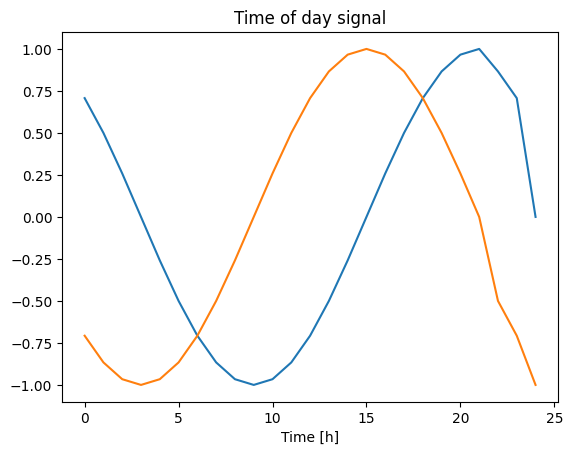

In [ ]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

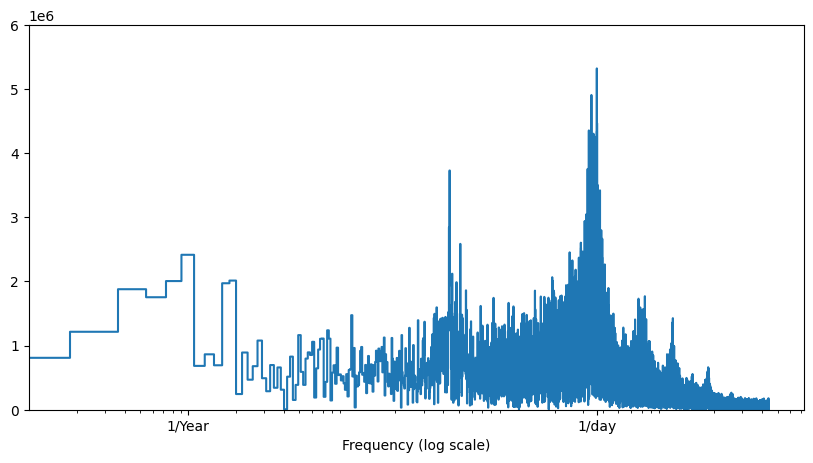

In [ ]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [ ]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

In [ ]:
df_5 = df_4.copy()

In [ ]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  float64
 11  weather_Clear         48204 non-null  bool   
 12  weather_Clouds        48204 non-null  bool   
 13  weather_Drizzle       48204 non-null  bool   
 14  weather_Fog           48204 non-nul

In [ ]:
df_5.to_csv('C:\\Users\\bhush\\Desktop\\DATA SCIENCE PROJECT\\metro_interstate_clean.zip',
          compression=dict(method='zip', archive_name='C:\\Users\\bhush\\Desktop\\DATA SCIENCE PROJECT\metro_interstate_clean.csv'),
          index=True)

In [ ]:
df_clean = pd.read_csv(r'C:\Users\bhush\Desktop\DATA SCIENCE PROJECT\metro_interstate_clean.zip', parse_dates=['date_time'], index_col='date_time')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  float64
 11  weather_Clear         48204 non-null  bool   
 12  weather_Clouds        48204 non-null  bool   
 13  weather_Drizzle       48204 non-null  bool   
 14  weather_Fog           48204 non-nul

In [ ]:

df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.00,1193.000000,3.380000e+03,4933.000000,7280.00
Day sin,48204.0,0.014283,0.708420,-1.00,-0.707107,1.525486e-12,0.707107,1.00
Day cos,48204.0,0.006631,0.705630,-1.00,-0.707107,6.790957e-13,0.707107,1.00
Year sin,48204.0,0.012317,0.697627,-1.00,-0.665969,-6.909727e-03,0.706330,1.00
Year cos,48204.0,-0.031720,0.715667,-1.00,-0.744263,-9.217264e-02,0.706604,1.00
temp,48204.0,281.259375,12.712720,243.39,272.160000,2.824500e+02,291.806000,310.07
clouds_all,48204.0,49.362231,39.015750,0.00,1.000000,6.400000e+01,90.000000,100.00
rain_1h,48204.0,0.130315,1.003368,0.00,0.000000,0.000000e+00,0.000000,55.63
snow_1h,48204.0,0.000222,0.008168,0.00,0.000000,0.000000e+00,0.000000,0.51
is_weekend,48204.0,0.284271,0.451071,0.00,0.000000,0.000000e+00,1.000000,1.00


In [ ]:
df_clean.index.duplicated().sum()

7629

In [ ]:
column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

Full dataset:	 48204
Number of features: 27


In [ ]:
sorted(column_indices.items(), key=lambda x: x[1])

[('traffic_volume', 0),
 ('Day sin', 1),
 ('Day cos', 2),
 ('Year sin', 3),
 ('Year cos', 4),
 ('temp', 5),
 ('clouds_all', 6),
 ('rain_1h', 7),
 ('snow_1h', 8),
 ('is_weekend', 9),
 ('is_holiday', 10),
 ('weather_Clear', 11),
 ('weather_Clouds', 12),
 ('weather_Drizzle', 13),
 ('weather_Fog', 14),
 ('weather_Haze', 15),
 ('weather_Mist', 16),
 ('weather_Rain', 17),
 ('weather_Smoke', 18),
 ('weather_Snow', 19),
 ('weather_Squall', 20),
 ('weather_Thunderstorm', 21),
 ('dayofweek', 22),
 ('day', 23),
 ('month', 24),
 ('year', 25),
 ('day_hour', 26)]

In [ ]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

train_df:	 33204
val_df:		 10000
test_df:	 5000


In [ ]:
train_df = df_clean[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_clean[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_clean[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

train_df:	 40110
val_df:		 8359
test_df:	 4083


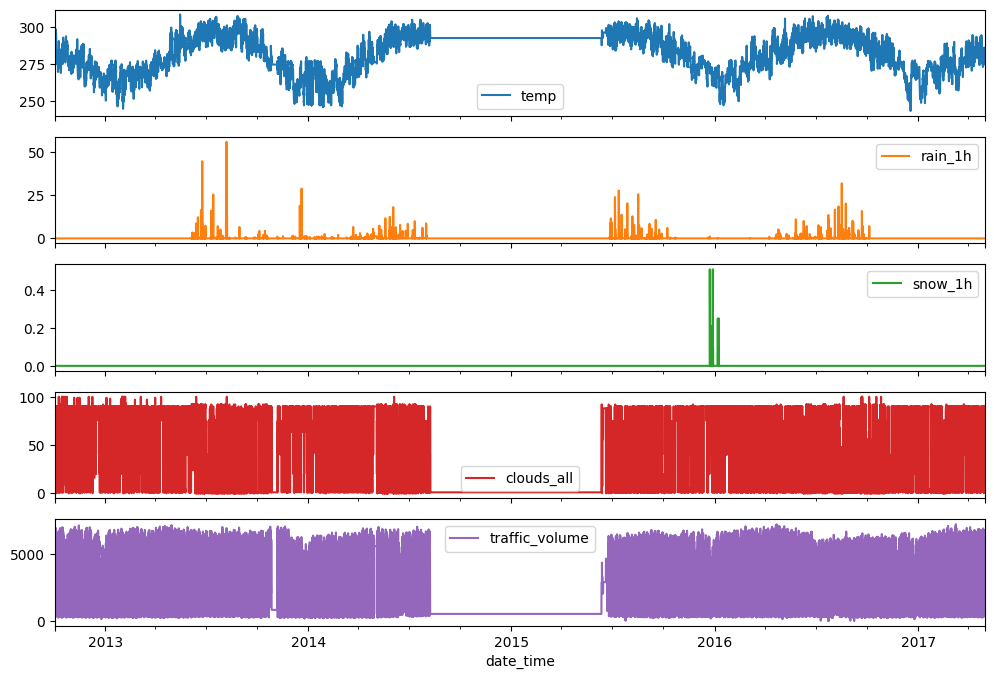

In [ ]:
plot_features = train_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

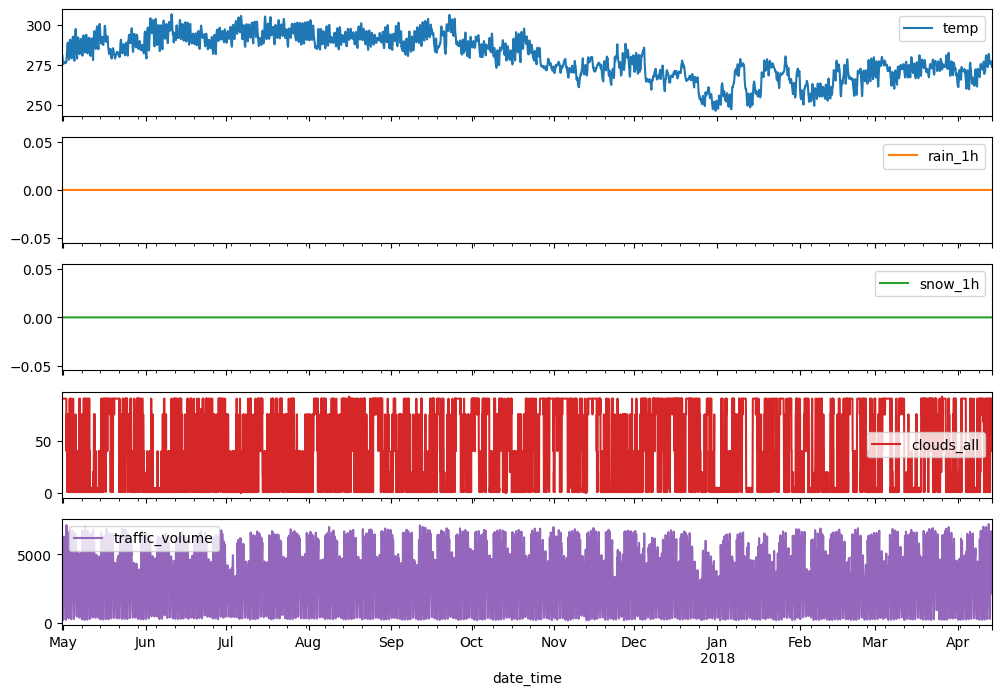

In [ ]:
plot_features = val_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

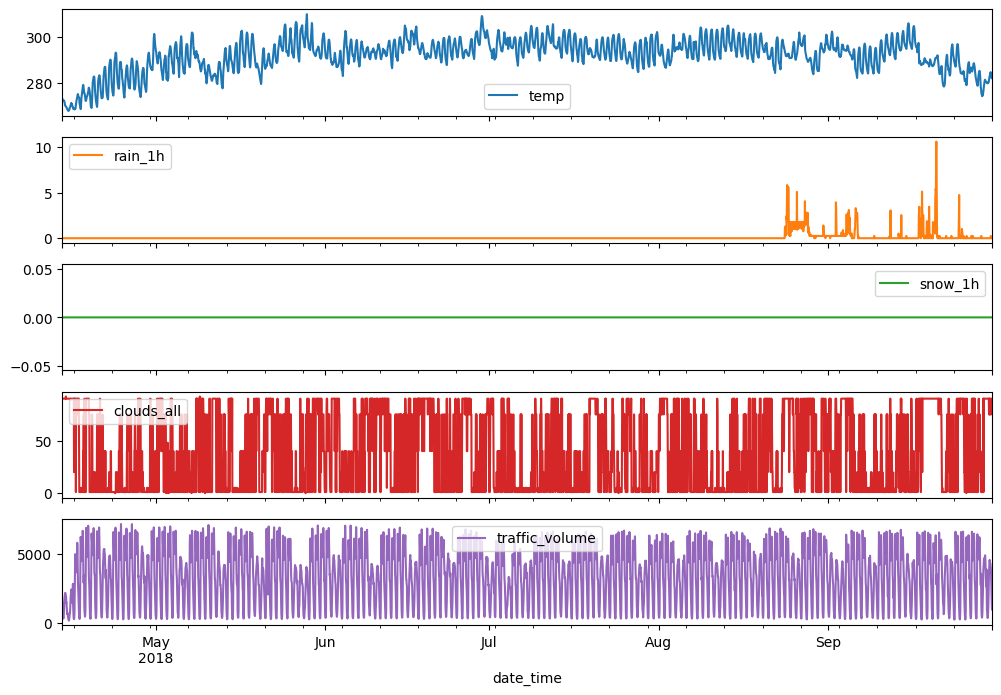

In [ ]:
plot_features = test_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
my_scaler = MinMaxScaler().fit(train_df)
my_scaler_tv = MinMaxScaler().fit(train_df[['traffic_volume']])
scaled_train_df = pd.DataFrame(my_scaler.transform(train_df), index=train_df.index, columns=train_df.columns)
scaled_val_df = pd.DataFrame(my_scaler.transform(val_df), index=val_df.index, columns=val_df.columns)
scaled_test_df = pd.DataFrame(my_scaler.transform(test_df), index=test_df.index, columns=test_df.columns)

#Let's test the normalizaing and denormalizing scheme

train_df.traffic_volume[0], scaled_train_df.traffic_volume[0], np.float64(my_scaler_tv.inverse_transform(scaled_train_df[['traffic_volume']])[0])

(5545.0, 0.7616758241758241, 5545.0)

In [ ]:
np.float64(my_scaler_tv.inverse_transform(np.array([[.7]])))

5096.0

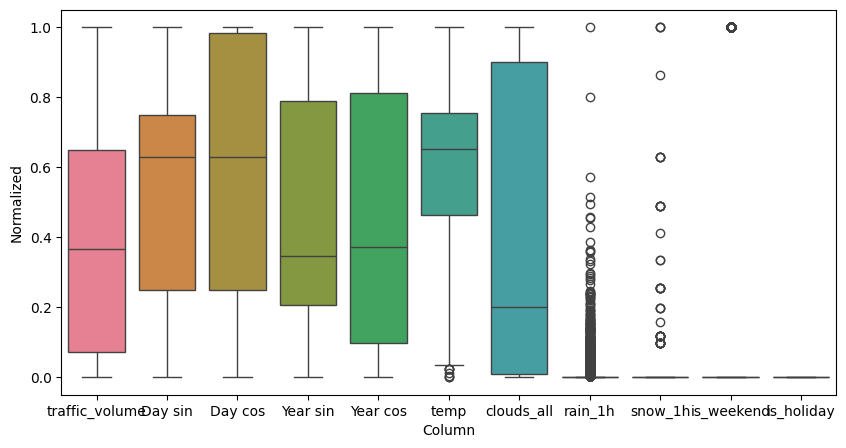

In [ ]:
df_scaled = scaled_train_df.iloc[:,:11].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Column', y='Normalized', data=df_scaled,hue='Column')

In [ ]:
# Utility functions
# Special Characters for Output Formating
StartBold = "\033[1m"
EndBold = "\033[0m"

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, batch_size=32,
               train_df=scaled_train_df, val_df=scaled_val_df, test_df=scaled_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.example = None

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.batch_size = batch_size

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size} = {self.input_width}+({self.shift-self.label_width}+{self.label_width})',
        f'Batch size: {self.batch_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices} start: [{self.label_start}]',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    '''
      Given a list consecutive inputs, the split_window method will convert
      them to a window of inputs and a window of labels.
    '''
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    '''
      The plot method that allows a simple visualization of the split window
    '''
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
    # Maskar: Added this line show that we are only showing n slices
    plt.suptitle(f'Showing only {max_n} slices')

  def make_dataset(self, data):
    '''
      Make_dataset method will take a time series DataFrame and convert it to
      a tf.data.Dataset of (input_window, label_window) pairs using the
      preprocessing.timeseries_dataset_from_array function.
    '''
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False, # Maskar: I changed this to False
        batch_size=self.batch_size, # 32,
        )

    ds = ds.map(self.split_window)

    return ds

  # The WindowGenerator object holds training, validation and test data.
  # Add properties for accessing them as tf.data.Datasets using the above make_dataset method.
  # Also add a standard example batch for easy access and plotting:
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  @example.setter
  def example(self, var):
    self._example = var

In [ ]:
def plot_train_validation(history, validation_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['val_'+metric], label='valid.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Validation Scores:{EndBold}\n')
    _ = history.model.evaluate(validation_data, verbose=2)

In [ ]:
class TrainingPlot(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.val_losses = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        val_loss = logs.get('val_'+self.loss_metric)

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.val_losses.append(val_loss)

        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:

            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            #plt.style.use("seaborn")
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.val_losses, label='valid.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
            val_denorm = np.float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))
            plt.title(f'Last validation value = {val_denorm:.2f}')
            plt.legend(loc='upper right')
            plt.show()

In [ ]:
def compile_and_fit(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    history = model.fit( window.train, epochs=max_epochs, validation_data=window.val, callbacks=[plot_metrics, early_stopping, rlr] )

    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Validation:{EndBold}\n')
        plot_train_validation(history, window.val)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.val, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    predictions = model.predict(window.val)
    evaluate_predictions(val_df.traffic_volume, predictions)
    return history

In [ ]:
def compile_and_fit(model, window, model_label, log_dict, epochs=20, patience=2):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=patience, mode='min'
    )

    history = model.fit(
        window.train,
        epochs=epochs,
        validation_data=window.val,
        callbacks=[early_stopping]
    )

    log_dict[model_label] = history
    return history


In [ ]:
def evaluate_predictions(y_true, y_pred, plot_start_index=-500):
    print(f'\n\n{StartBold}Predictions Evaluation:{EndBold}\n')
    y_p = np.asarray(my_scaler_tv.inverse_transform(y_pred.reshape(-1,1))).ravel()
    n_predictions = len(y_p)
    y = np.asarray(y_true[-n_predictions:]).ravel()
    print('Predictions:', n_predictions)
    mae = np.float(tf.metrics.mean_absolute_error(y, y_p))
    mae_scaled = np.float(my_scaler_tv.transform(np.array([[mae]])))
    print(f'MAE: {mae:.2f} ({mae_scaled:.4f})')

    plt.subplots(figsize=(15,2))
    plt.plot(y[plot_start_index:], marker='.', label='true')
    plt.plot(y_p[plot_start_index:], marker='.', label='predicted')
    plt.legend()
    plt.show()

Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']

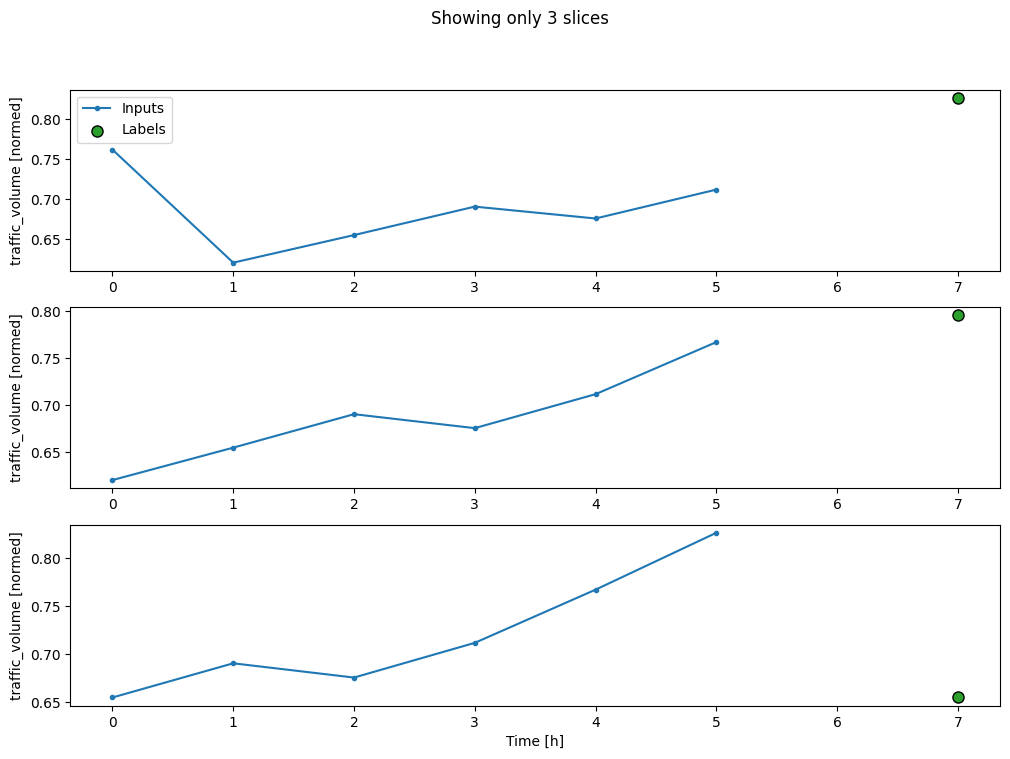

In [ ]:
INPUT_WIDTH = 6
OUT_STEPS = 1
SHIFT = 2
base_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )

base_window.plot()
base_window

In [ ]:
multi_val_performance = {}
multi_performance = {}
my_models = {}

my_log = {
    'multi_val_performance':multi_val_performance,
    'multi_performance':multi_performance,
    'my_models':my_models
    }

In [ ]:
%%time
model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.1160 - val_loss: 0.0152 - val_mean_absolute_error: 0.0953
Epoch 2/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0777 - val_loss: 0.0158 - val_mean_absolute_error: 0.0997
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0703 - val_loss: 0.0141 - val_mean_absolute_error: 0.0923
Epoch 4/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0666 - val_loss: 0.0111 - val_mean_absolute_error: 0.0811
Epoch 5/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0629 - val_loss: 0.0082 - val_mean_absolute_error: 0.0690
Epoch 6/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0598 - val_loss: 0.0062 - val_mean_absolute_error: 0.0587
Epoch 7/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0080 - mean_absolute_

In [ ]:
%%time
model_label = 'LSTM'
current_window = base_window

lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    Dense(OUT_STEPS)
])

history = compile_and_fit(lstm_model, current_window,
                          model_label=model_label, log_dict=my_log)

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0329 - mean_absolute_error: 0.1232 - val_loss: 0.0155 - val_mean_absolute_error: 0.0930
Epoch 2/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0809 - val_loss: 0.0136 - val_mean_absolute_error: 0.0852
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0119 - mean_absolute_error: 0.0717 - val_loss: 0.0106 - val_mean_absolute_error: 0.0754
Epoch 4/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0100 - mean_absolute_error: 0.0655 - val_loss: 0.0088 - val_mean_absolute_error: 0.0698
Epoch 5/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0088 - mean_absolute_error: 0.0609 - val_loss: 0.0068 - val_mean_absolute_error: 0.0611
Epoch 6/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0560 - val_loss: 0.0057 - val_mean_absolute_error: 0.0542
Epoch 7/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0071 - mean_abso

In [ ]:
my_window1 = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )
print("my_window1", my_window1)

# I created another WindowGen to experiment with the batch size in my models
my_window2 = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=64
                               )
print("my_window2", my_window2)

my_window1 Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']
my_window2 Total window size: 8 = 6+(1+1)
Batch size: 64
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']


In [ ]:
%%time
model_label = 'MyLSTM_1'
current_window = my_window1

my_lstm_model = tf.keras.Sequential([
    LSTM(512, return_sequences=True),
    LSTM(512, return_sequences=False),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(my_lstm_model, current_window,
                          model_label=model_label, log_dict=my_log,
                          )

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 325s 256ms/step - loss: 0.0308 - mean_absolute_error: 0.1192 - val_loss: 0.0117 - val_mean_absolute_error: 0.0807
Epoch 2/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 316s 252ms/step - loss: 0.0123 - mean_absolute_error: 0.0709 - val_loss: 0.0067 - val_mean_absolute_error: 0.0563
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 315s 251ms/step - loss: 0.0086 - mean_absolute_error: 0.0576 - val_loss: 0.0056 - val_mean_absolute_error: 0.0503
Epoch 4/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 327s 256ms/step - loss: 0.0076 - mean_absolute_error: 0.0529 - val_loss: 0.0048 - val_mean_absolute_error: 0.0463
Epoch 5/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 315s 251ms/step - loss: 0.0075 - mean_absolute_error: 0.0524 - val_loss: 0.0046 - val_mean_absolute_error: 0.0454
Epoch 6/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 323s 252ms/step - loss: 0.0072 - mean_absolute_error: 0.0507 - val_loss: 0.0043 - val_mean_absolute_error: 0.0443
Epoch 7/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 320s 250ms/step - loss

In [ ]:
my_lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 6, 512)              │       1,105,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 512)                 │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,192,837 (42.70 MB)

 Trainable params: 3,730,945 (14.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,461,892 (28.46 MB)

In [ ]:
%%time
model_label = 'MyLSTM_2'
current_window = my_window1

forward_layer = LSTM(512, return_sequences=True)
backward_layer = LSTM(512, return_sequences=True, go_backwards=True)

my_lstm_model = tf.keras.Sequential([
    Bidirectional(forward_layer, backward_layer=backward_layer),
    Bidirectional(LSTM(512, return_sequences=False, stateful=False)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(my_lstm_model, current_window,
                          model_label=model_label, log_dict=my_log,
                          )

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 864s 674ms/step - loss: 0.0298 - mean_absolute_error: 0.1170 - val_loss: 0.0112 - val_mean_absolute_error: 0.0757
Epoch 2/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 859s 672ms/step - loss: 0.0166 - mean_absolute_error: 0.0825 - val_loss: 0.0077 - val_mean_absolute_error: 0.0601
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 867s 676ms/step - loss: 0.0100 - mean_absolute_error: 0.0628 - val_loss: 0.0066 - val_mean_absolute_error: 0.0547
Epoch 4/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 861s 676ms/step - loss: 0.0080 - mean_absolute_error: 0.0541 - val_loss: 0.0055 - val_mean_absolute_error: 0.0507
Epoch 5/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 850s 678ms/step - loss: 0.0074 - mean_absolute_error: 0.0514 - val_loss: 0.0046 - val_mean_absolute_error: 0.0466
Epoch 6/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 840s 670ms/step - loss: 0.0070 - mean_absolute_error: 0.0494 - val_loss: 0.0043 - val_mean_absolute_error: 0.0446
Epoch 7/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 851s 661ms/step - loss

In [ ]:
my_lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 6, 1024)             │       2,211,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1024)                │       6,295,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,886,085 (106.38 MB)

 Trainable params: 9,295,361 (35.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,590,724 (70.92 MB)

In [ ]:
print(my_lstm_model.metrics_names)


['loss', 'compile_metrics']


In [ ]:
my_models['MyLSTM_2'] = my_lstm_model

In [ ]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')
print()

for name, value in multi_performance.items():
    z = np.float(my_scaler_tv.inverse_transform(np.array([[value[1]]])))
    print(f'{name:8s}: {z:0.4f}')

In [ ]:
print(my_models.keys())


dict_keys(['MyLSTM_2'])
